## Workshop
Link: https://carpentries-incubator.github.io/geospatial-python/05-access-data.html

In [2]:
import rasterio

In [3]:
api_url = "https://earth-search.aws.element84.com/v1"

In [6]:
pip install pystac_client

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for pystac_client from https://files.pythonhosted.org/packages/95/57/a9c987b9c9d6c41bbe7050ea5f1ac50c9e50af5c317e6e9122066aeef822/pystac_client-0.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for pystac[validation]>=1.8.2 from https://files.pythonhosted.org/packages/2a/34/190016e443ff35ed24efacc810b0ae5d770022e8d3fb460608c0764f6c6d/pystac-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema~=4.18 from https://files.pythonhosted.org/packages/39/9d/b035d024c62c85f2e2d4806a59ca7b8520307f34e0932fbc8cc75fe7b2d9/jsonschema-4.21.1-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa6703fcf4a79018f/attrs-23.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/ee/07/44bd408781594c4d0a027666ef27f

In [8]:
from pystac_client import Client

In [9]:
client = Client.open(api_url)

Data Link: https://radiantearth.github.io/stac-browser/#/external/earth-search.aws.element84.com/v1/collections/sentinel-2-l2a?.itemFilterOpen=1

In [15]:
collection = "sentinel-2-l2a" ## Desirable Collection of Satelites

## Searching Data for a ROI

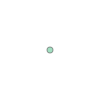

In [162]:
from shapely.geometry import Point
# point = Point(4.89, 52.37)                              ## Amsterdam
# point = Point(11.214004183451985, 35.09230120258948) ## GER Dam
point = Point(12.098222214083698, 37.2860613479277) ## Lake Tana
point

In [163]:
search = client.search(
    collections =[collection],
    intersects = point,
    max_items = 10
)


In [164]:
print(search.matched())

1163


In [165]:
items = search.item_collection()
print(len(items))

10


In [77]:
for item in items:
    print(item)

<Item id=S2B_32SPD_20240209_0_L2A>
<Item id=S2A_32SPD_20240204_0_L2A>
<Item id=S2B_32SPD_20240130_0_L2A>
<Item id=S2A_32SPD_20240125_0_L2A>
<Item id=S2B_32SPD_20240120_1_L2A>
<Item id=S2A_32SPD_20240115_0_L2A>
<Item id=S2B_32SPD_20240110_0_L2A>
<Item id=S2A_32SPD_20240105_0_L2A>
<Item id=S2B_32SPD_20231231_0_L2A>
<Item id=S2A_32SPD_20231226_0_L2A>


In [78]:
# item = items[0]
# print(item.properties)

In [79]:
print(item.geometry)

{'type': 'Polygon', 'coordinates': [[[10.099051679346509, 35.238078420193936], [10.086017095119333, 34.24812007424131], [11.277818022502068, 34.23176656016562], [11.305134172724502, 35.221114030024694], [10.099051679346509, 35.238078420193936]]]}


In [80]:
# print(item.datetime)
print(item.id)

S2A_32SPD_20231226_0_L2A


## Excercise - Searching

In [166]:
from shapely.geometry import box
# box(minx, miny, maxx, maxy, ccw=True)
Boundary = box(4.89, 52.37, 5.89, 53.37)

bbox = point.buffer(1.01).bounds
print(bbox)

(11.088222214083698, 36.2760613479277, 13.108222214083698, 38.2960613479277)


In [173]:
search = client.search(
    collections =[collection],
    bbox = bbox,
    # datetime = "2020-03-20/2020-03-30",
    datetime = "2020-01-01/2024-01-30",
    query = ["eo:cloud_cover<1"],
)

In [174]:
print(search.matched())

1620


In [175]:
items = search.item_collection()
# items.save_object("../Data/01_search.json")
# items.save_object("../Data/01_search_lake_tana.json")

## Exploring the Data

In [182]:
assets = items[9].assets
# for key, asset in assets.items():
#     print(key,asset.title)

print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [183]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/S/PH/2023/11/S2A_32SPH_20231116_0_L2A/thumbnail.jpg
